## Final Project Submission

Please fill out:
* Student name: GEORGE MACHOKA
* Student pace: PART TIME
* Scheduled project review date/time: JUNE 3RD
* Instructor name: WINNIE ANYOSO
* Blog post URL:


# MICROSOFT MOVIE ANALYSIS


## Business Overview

Microsoft Studios is excited to venture into the creative arts and movie production industry. To support the head of Microsoft Movies, this project aims to analyze box office performance and identify trends in successful films. The key questions we will investigate include:



1. Genres
- Which genres perform best at the box office?
2. Directors
- Who are the top-performing directors at the box office?
3. Studios
- Which studios achieve the highest box office success?



In [11]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline


## Data Understanding

We have two data sources: a SQLite3 database containing movie information across various tables, and CSV files from imdb

## Database

The database includes five tables, of which three are pertinent to our analysis: Movie Basics, Directors, and Movie Ratings. To align with our objectives, I joined these three tables on the common feature movie_id to create a consolidated table, ensuring to select only relevant features and avoid duplications. The selected features are movie_id, original_title, primary_name, runtime_minutes, genres, averagerating, and numvotes. I then transformed this consolidated table into a Pandas DataFrame using the Pandas library for easier data manipulation.









In [12]:
#connect using sqlite3 library
conn = sqlite3.connect("im.db")


In [13]:
#read the file
pd.read_sql("SELECT * FROM sqlite_master;", conn).head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [14]:
#query the database
query = """
    SELECT original_title as title, primary_name AS director, 
        runtime_minutes, genres
    FROM directors
    JOIN persons
        USING (person_id)
    JOIN movie_basics
        USING (movie_id)
    JOIN movie_ratings
        USING (movie_id)
"""
im_df = pd.read_sql(query, conn)
im_df.tail()

,title,director,runtime_minutes,genres
181382,Reversing Roe,Anne Sundberg,99.0,Documentary
181383,The Princess Switch,Mike Rohl,101.0,Romance
181384,The Princess Switch,Mike Rohl,101.0,Romance
181385,Doozy,Richard Squires,70.0,"Animation,Comedy"
181386,Syndebukken: Prosessen mot Harry Lindstrøm,Fredrik Horn Akselsen,NaN,Documentary


In [15]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            181387 non-null  object 
 1   director         181387 non-null  object 
 2   runtime_minutes  163584 non-null  float64
 3   genres           180047 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


# CSV FILES

The first CSV file includes movie titles, studios, gross earnings in domestic and foreign currencies, and the year of release or production, with a total of 3,387 records.

The second CSV file contains various features such as genre IDs, movie ID, original language, original title, popularity, release date, title, vote average, and vote count, encompassing 26,517 records.

Finally, budget information and other related data come from the budget CSV file, which has 5,782 records. This dataset includes six features: ID, release date, movie title, production budget, domestic gross, and worldwide gross.





# BOM Data

In [16]:
bom_df = pd.read_csv("bom.movie_gross.csv")
print(bom_df.shape)
bom_df.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## TMBD Data

In [20]:
tmdb_df = pd.read_csv("tmdb.movies.csv", index_col=0)
print(tmdb_df.shape)
tmdb_df.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


# Movie Budgets Data

In [22]:
budgets_df = pd.read_csv('tn.movie_budgets.csv')
print(budgets_df.shape)
budgets_df.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation

# Data Cleaning
 We remove the data thet we dont need from the datasets

Cleaning TMDB dataset

In [23]:
# Drop the columns we dont need columns in tmdb_df
tmdb_df.drop(columns=["genre_ids", "id", "original_language", "original_title"], inplace=True)

In [24]:
tmdb_df.isna().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [25]:
#checf for duplicates
tmdb_df.duplicated().sum()

1020

In [26]:
#drop duplicates
tmdb_df.drop_duplicates(inplace=True)


In [27]:
#confirm if there are duplicates
tmdb_df.duplicated().sum()

0

In [28]:
tmdb_df.shape

(25497, 5)

# Clean BOM DataFrame

In [29]:
#check number of duplicates
bom_df.duplicated().sum()

0

In [30]:
# check missing values in each column
bom_df.isna().sum()/ bom_df.shape[0] * 100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [31]:
# foreign_gross column does not have 40% of data 
#we drop
bom_df.drop(axis=1, columns=["foreign_gross"], inplace=True)

In [32]:
bom_df.isna().sum()/ bom_df.shape[0] * 100

title             0.000000
studio            0.147623
domestic_gross    0.826690
year              0.000000
dtype: float64

In [33]:
# Drop records with missing data in the "studio" column
bom_df.dropna(axis=0, inplace=True)
bom_df.shape

(3356, 4)

In [34]:
# Rename
bom_df = bom_df.rename(columns={"domestic_gross":"revenue"})

In [35]:
# Check shape
bom_df.shape

(3356, 4)

# Clean Budgets DataFrame

In [36]:
budgets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [37]:
# Change the datatypes of the production_budget, domestic gross and worldwide gross features to integers
for col in ['production_budget', 'domestic_gross',
       'worldwide_gross']:
    if budgets_df[col].dtype == 'O':
        budgets_df[col] = budgets_df[col].map(lambda record: record.replace("$", ""))
        budgets_df[col] = budgets_df[col].map(lambda record: record.replace(",", ""))
        budgets_df[col] = budgets_df[col].apply(int)

In [38]:
# Confirm data type
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [39]:
# Change the column movie to title
budgets_df = budgets_df.rename(columns={"movie":"title", "production_budget":"budget", "domestic_gross":"revenue"})

# Confirm change of feature name
budgets_df.columns

Index(['id', 'release_date', 'title', 'budget', 'revenue', 'worldwide_gross'], dtype='object')

In [40]:
# Drop features already present in the other dataframes
budgets_df.drop(axis=1, labels=['id', 'release_date', 'worldwide_gross', "revenue"],
               inplace=True)

# Check
budgets_df.shape

(5782, 2)


# Clean IM DataFrame

In [41]:
im_df.describe()

,runtime_minutes
count,163584.000000
mean,97.789484
std,194.434689
min,3.000000
25%,84.000000
50%,94.000000
75%,107.000000
max,51420.000000


In [42]:
# check percentage of missing values
print(im_df.shape)
im_df.isna().sum()/im_df.shape[0] * 100

(181387, 4)


title              0.000000
director           0.000000
runtime_minutes    9.814926
genres             0.738752
dtype: float64

In [43]:
im_df.dropna(axis=0, inplace=True)
im_df.shape
im_df.isna().sum()

title              0
director           0
runtime_minutes    0
genres             0
dtype: int64

In [44]:
# Eliminate the duplicates
im_df.duplicated().sum() # 86218

im_df.drop_duplicates(subset=['title', 'runtime_minutes', 
                              'genres',], keep='first', inplace=True)

im_df.duplicated().sum()

0

In [45]:
im_df = im_df[im_df["runtime_minutes"] <= 300]

In [47]:
im_df.shape
im_df.describe()

,runtime_minutes
count,65256.000000
mean,93.504153
std,22.699702
min,3.000000
25%,81.000000
50%,91.000000
75%,104.000000
max,300.000000


## Data Merging

After cleaning all the datasets and databases, we can merge then using TITLE

Merge TMDB dataset with BOM dataset

In [48]:
# Merging the bom datasets
bomtmdb = pd.merge(left=bom_df, right=tmdb_df, how="inner", on="title")

Merge the BOMTMDB Dataset with the Budgets dataset

In [51]:
secondary_df = pd.merge(left=bomtmdb, right=budgets_df, how="inner", on="title")

Merge IM dataset with Secondary dataset

In [52]:
movies_df = pd.merge(secondary_df, im_df, how='inner', on='title')

Preview the merged dataset

In [53]:
print(movies_df.shape)
movies_df.head()

(1506, 12)


,title,studio,revenue,year,popularity,release_date,vote_average,vote_count,budget,director,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,2010,24.445,2010-06-17,7.7,8340,200000000,Lee Unkrich,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,2010,27.920,2010-07-16,8.3,22186,160000000,Christopher Nolan,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,2010,15.041,2010-05-16,6.1,3843,165000000,Mike Mitchell,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,20.340,2010-06-23,6.0,4909,68000000,David Slade,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,2010,28.515,2010-05-07,6.8,12368,170000000,Jon Favreau,124.0,"Action,Adventure,Sci-Fi"


# Data Exploration

# Feature Engineering


Two important features I consider necessary for the dataset are:

-Profit

This represents the difference between revenues and the budget.


-Month Produced

This feature will help us identify the month in which movies were produced.






In [54]:
movies_df["profit"] = movies_df["revenue"] - movies_df["budget"]
movies_df["month"] = movies_df["release_date"].map(lambda date: date[5:7])

In [55]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1506 non-null   object 
 1   studio           1506 non-null   object 
 2   revenue          1506 non-null   float64
 3   year             1506 non-null   int64  
 4   popularity       1506 non-null   float64
 5   release_date     1506 non-null   object 
 6   vote_average     1506 non-null   float64
 7   vote_count       1506 non-null   int64  
 8   budget           1506 non-null   int64  
 9   director         1506 non-null   object 
 10  runtime_minutes  1506 non-null   float64
 11  genres           1506 non-null   object 
 12  profit           1506 non-null   float64
 13  month            1506 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 176.5+ KB


In [56]:
movies_df.describe()

,revenue,year,popularity,vote_average,vote_count,budget,runtime_minutes,profit
count,1.506000e+03,1506.000000,1506.000000,1506.000000,1506.000000,1.506000e+03,1506.000000,1.506000e+03
mean,6.111259e+07,2013.859894,12.301907,6.289841,2069.926959,4.574091e+07,106.807437,1.537168e+07
std,8.547073e+07,2.556659,8.254737,1.051528,2844.836864,5.549494e+07,19.177751,6.264574e+07
min,8.000000e+02,2010.000000,0.600000,0.000000,1.000000,5.000000e+04,3.000000,-2.019000e+08
25%,6.800000e+06,2012.000000,7.851250,5.800000,301.250000,1.000000e+07,94.000000,-1.145000e+07
50%,3.505000e+07,2014.000000,10.740500,6.300000,1008.500000,2.500000e+07,105.000000,8.000000e+05
75%,7.617500e+07,2016.000000,15.434750,6.900000,2569.000000,5.590000e+07,118.000000,2.935000e+07
max,7.001000e+08,2018.000000,80.773000,10.000000,22186.000000,4.106000e+08,180.000000,5.001000e+08


## visualization Functions

In [58]:
def plot_bar(data, title, xlabel, ylabel,figsize=(8, 6), x=10, y=10):
    """
    This function creates a bar chart.
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    x = data.index
    y = data.values
    ax.bar(x=x, height=y)
    plt.show();
    
    
def plot_hist(data, title, xlabel, ylabel, bins=20, figsize=(8, 6)):
    """
    This function creates a bar chart.
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.hist(x=data, bins=20)
    plt.show();
    
def plot_scatter(x, y, title, xlabel, ylabel, alpha=0.2, figsize=(8, 6)):
    """
    This function quickly plots a scatter plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.scatter(x=movies_df["vote_count"], y=movies_df['revenue'], alpha=0.2)
    plt.show();

In [59]:
def generate_financials(feature, basis="count"):
    
    """
    This method takes one feature as an argument.
    It first gets the top 10 items in the feature based on count.
    It uses the mean to aggregate the dataframe based on the feature.
    It returns two figures showing the 
    1. Revenue against Budget per feature
    2. Profit Margin per feature
    """
    
    # Value counts
    if basis == "vote count":
        feature_counts = movies_df.groupby(feature).mean()["vote_count"].sort_values(ascending=False)[:10]
    else:
        feature_counts = movies_df[feature].value_counts(ascending = False)[:10]
    
    # Top 10 items based on count
    top_10_feature_indices = list(feature_counts.index)

    # Prepare a new dataframe based on the Top 10 items per feature
    profit_margin = movies_df[movies_df[feature].isin(top_10_feature_indices)].groupby(feature).mean().reset_index()

    # Creating key columns - Profit Margin
    profit_margin["profit_percent"] = round(((profit_margin["revenue"] - profit_margin["budget"])
                                             / profit_margin["revenue"]) * 100, 2)
    
    # The Matplotlib Figure
    fig, (ax1, ax2) = plt.subplots(figsize=(16, 8), ncols=2)
    plt.xticks(rotation=45, ha='right')
    
    width = 0.4
    
    values = np.arange(len(top_10_feature_indices))
    
    ax1.bar(x=values, height=profit_margin['revenue'], label="Revenue", width=width)
    ax1.bar(x=values+width, height=profit_margin['budget'], label="Budget", width=width)
    ax1.set_title('Revenues V Budgets per {}' .format(feature.capitalize()))
    ax1.set_ylabel('Amount in Dollars in 1e8')
    ax1.set_xlabel(feature.capitalize())
    ax1.set_xticks(np.arange(len(top_10_feature_indices)))
    ax1.set_xticklabels(top_10_feature_indices, rotation=45, ha='right')
    ax1.legend()
    
    ax2.bar(x=profit_margin[feature], height=profit_margin['profit_percent'])
    ax2.set_title('Profit Margin per {}' .format(feature.capitalize()))
    ax2.set_ylabel('Percentage')
    ax2.set_xlabel(feature.capitalize())

# Explore Movie Runtimes

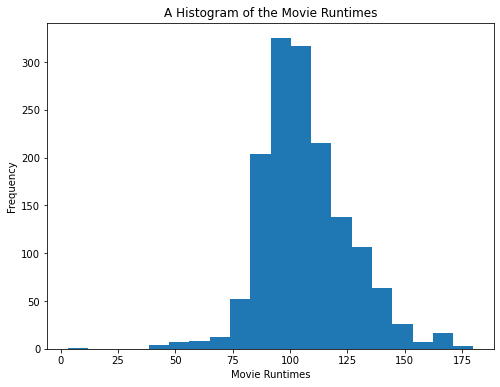

In [60]:
# movies_df.runtime_minutes.plot(kind="hist", bins=20)
data = movies_df.runtime_minutes
plot_hist(data=data, 
          title="A Histogram of the Movie Runtimes",
         xlabel="Movie Runtimes",
         ylabel="Frequency");

Observation:


The curve appears to be nearly normal, with a slight skew to the left. It can be estimated that most movies have a runtime between 90 and 110 minutes.

## Explore Months that movies were released


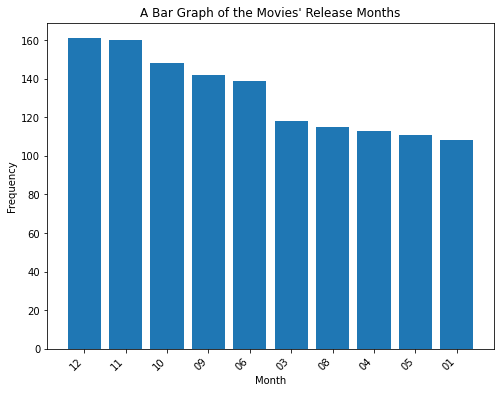

In [62]:
#### Exploring Release Months
data = movies_df["month"].value_counts()[:10]
plot_bar(data=data,
          title="A Bar Graph of the Movies' Release Months",
         xlabel="Month",
         ylabel="Frequency");

Observation:


The bar graph indicates that the optimal months for releasing movies are December and November.

# Explore Vote Average

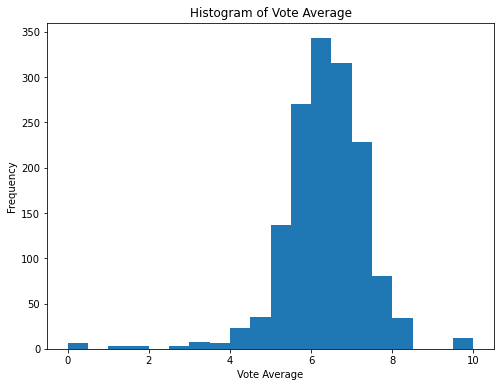

In [63]:
plot_hist(data=movies_df.vote_average,
         title="Histogram of Vote Average",
         xlabel="Vote Average",
         ylabel="Frequency")

Observation:


The curve appears to be nearly normal with a slight left skew. It can be estimated that the most common average rating is around 6. Microsoft Movies would need to be truly exceptional to exceed this benchmark.

# Exploring Vote Count

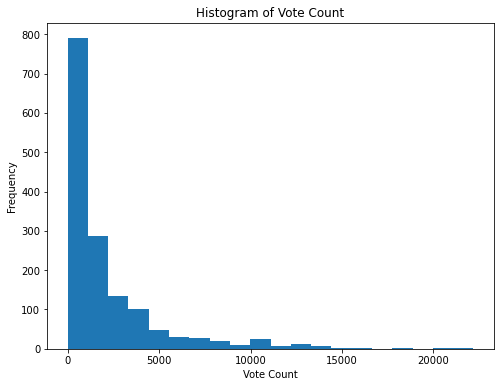

In [64]:
plot_hist(data=movies_df.vote_count,
         title="Histogram of Vote Count",
         xlabel="Vote Count",
         ylabel="Frequency")

Observation:


The curve has a long right tail, indicating that while all movies receive some vote counts, very few accumulate more than 5,000 votes.







# Exploring bivariate data

In [65]:
# Viewing the correlation between features
movies_df.corr()

,revenue,year,popularity,vote_average,vote_count,budget,runtime_minutes,profit
revenue,1.000000,0.088981,0.490279,0.173546,0.679946,0.681023,0.177625,0.761064
year,0.088981,1.000000,0.171905,0.027547,0.039881,-0.034278,0.027447,0.151767
popularity,0.490279,0.171905,1.000000,0.297001,0.680418,0.520900,0.233596,0.207472
vote_average,0.173546,0.027547,0.297001,1.000000,0.360506,0.086138,0.226465,0.160472
vote_count,0.679946,0.039881,0.680418,0.360506,1.000000,0.555625,0.266869,0.435482
budget,0.681023,-0.034278,0.520900,0.086138,0.555625,1.000000,0.264146,0.043300
runtime_minutes,0.177625,0.027447,0.233596,0.226465,0.266869,0.264146,1.000000,0.008348
profit,0.761064,0.151767,0.207472,0.160472,0.435482,0.043300,0.008348,1.000000


Observation:


The features that exhibit a strong positive correlation with each other are:

-Vote Count and Popularity: 68.0%

-Profit and Revenue: 76.1%

-Revenue and Vote Count: 68.2%

-Revenue and Budget: 68.1%

# Exploring Vote Count against Revenue

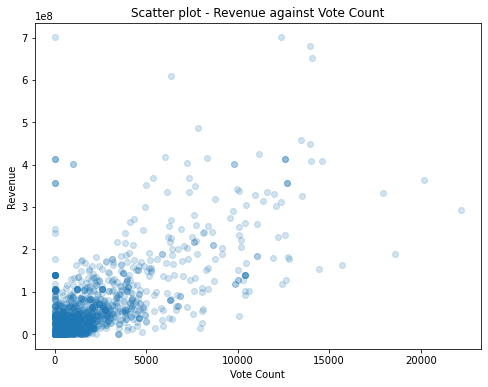

In [67]:
plot_scatter(x=movies_df["vote_count"], y=movies_df['revenue'],
             title = "Scatter plot - Revenue against Vote Count", 
             xlabel = "Vote Count", 
             ylabel = "Revenue")

Observation:


The scatter plot indicates a somewhat positive relationship between vote counts and revenue, suggesting that more votes tend to correlate with higher returns.

# Exploring count against popularity

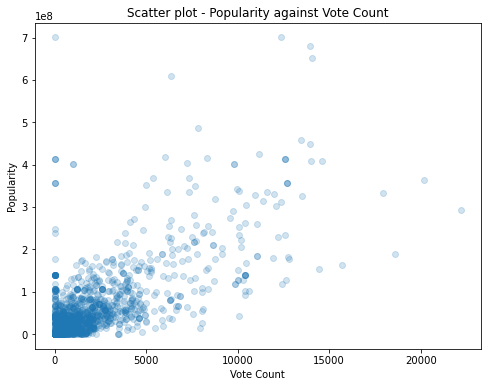

In [69]:
plot_scatter(x=movies_df["vote_count"], y=movies_df['popularity'],
             title = "Scatter plot - Popularity against Vote Count", 
             xlabel = "Vote Count", 
             ylabel = "Popularity")

Observation:


The scatter plot reveals a somewhat positive relationship between vote counts and popularity, indicating that more votes correlate with increased popularity among the audience.

## Exploration of Genres, Directors and Studios

Exploring Genres

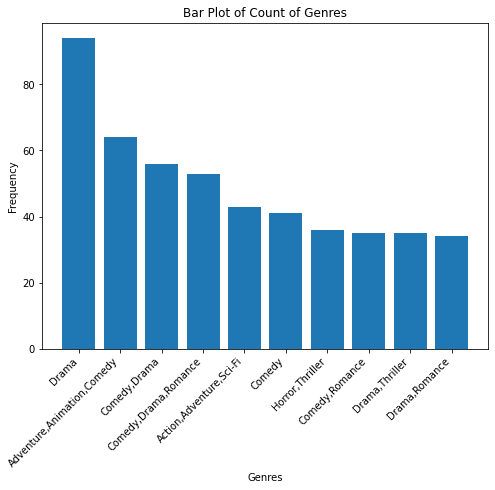

In [70]:
# Top 10 Genres by Count
data = movies_df["genres"].value_counts()[:10]
plot_bar(data=data,
        title="Bar Plot of Count of Genres",
        xlabel="Genres",
        ylabel="Frequency")

Observation:


The bar chart displays the top 10 movies based on their count in the dataset. Dramas dominate the list, while Horror|Thriller, Comedy|Romance, and Drama|Thriller/Romance are at the bottom. However, examining the top movies based on their average revenues shows different results.







In [71]:
top_10_genres = movies_df.groupby("genres")["revenue"].mean().sort_values(ascending = False)[:10]
top_10_genres

genres
Sci-Fi                           4.126000e+08
Documentary,Drama,Sport          4.126000e+08
Adventure,Drama,Sport            4.007000e+08
Biography,Documentary,History    3.565000e+08
Comedy,Mystery                   2.545000e+08
Action,Adventure,Sci-Fi          2.458860e+08
Adventure,Drama,Sci-Fi           2.082000e+08
Adventure,Fantasy                1.929000e+08
Animation,Comedy,Family          1.750400e+08
Biography,Drama,Musical          1.743000e+08
Name: revenue, dtype: float64

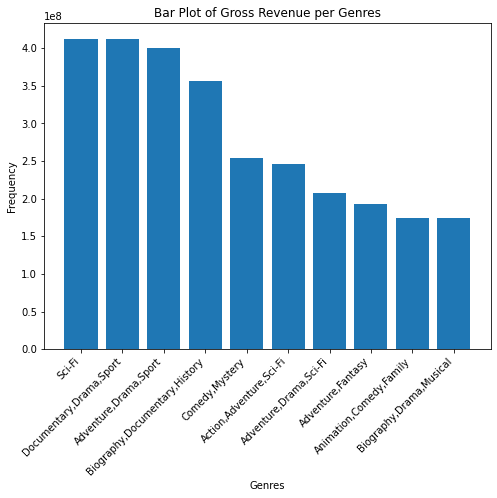

In [72]:
# Genres' Revenue generation
genre_revenues = movies_df.groupby("genres")["revenue"].mean().sort_values(ascending = False)[:10]
# genre_revenues.plot(kind='bar');
plot_bar(data=genre_revenues,
        title="Bar Plot of Gross Revenue per Genres",
        xlabel="Genres",
        ylabel="Frequency")

Observation:


The bar chart displays the top 10 movies based on their average revenues in the dataset. Sci-Fi leads the list, while Animation|Comedy|Family and Biography|Drama|Musical are at the bottom. Additionally, we can explore the relationship between Revenue and Budget as well as Gross Margins.

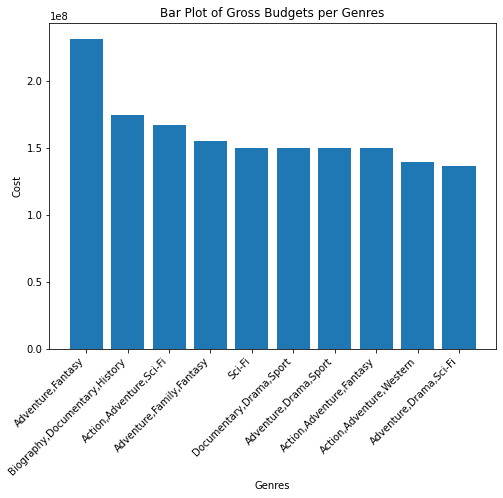

In [73]:
# Genres' Budget Constraints
genre_budgets = movies_df.groupby("genres")["budget"].mean().sort_values(ascending = False)[:10]
# genre_revenues.plot(kind='bar');
plot_bar(data=genre_budgets,
        title="G",
        xlabel="Genres",
        ylabel="Cost")

Exploring the revenue and budgets across different genres has yielded confusing results. To ensure accurate profitability assessment, it's advisable to utilize the profit feature available in the dataset.







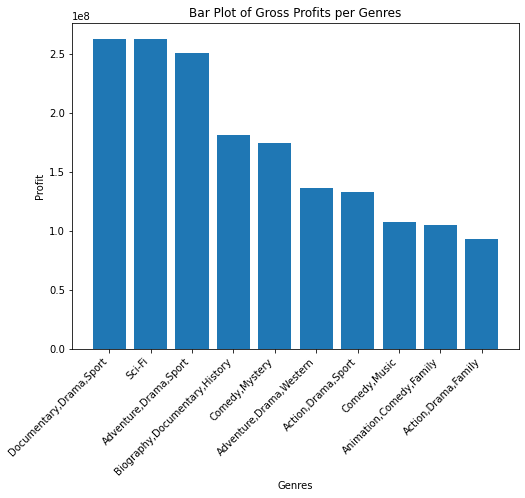

In [74]:
# Genres' Profit Constraints
genre_profits = movies_df.groupby("genres")["profit"].mean().sort_values(ascending = False)[:10]
# genre_revenues.plot(kind='bar');
plot_bar(data=genre_profits,
        title="Bar Plot of Gross Profits per Genres",
        xlabel="Genres",
        ylabel="Profit")


For a comparative analysis of genre profits, it's recommended to utilize the profit margin, expressed as a percentage per genre.

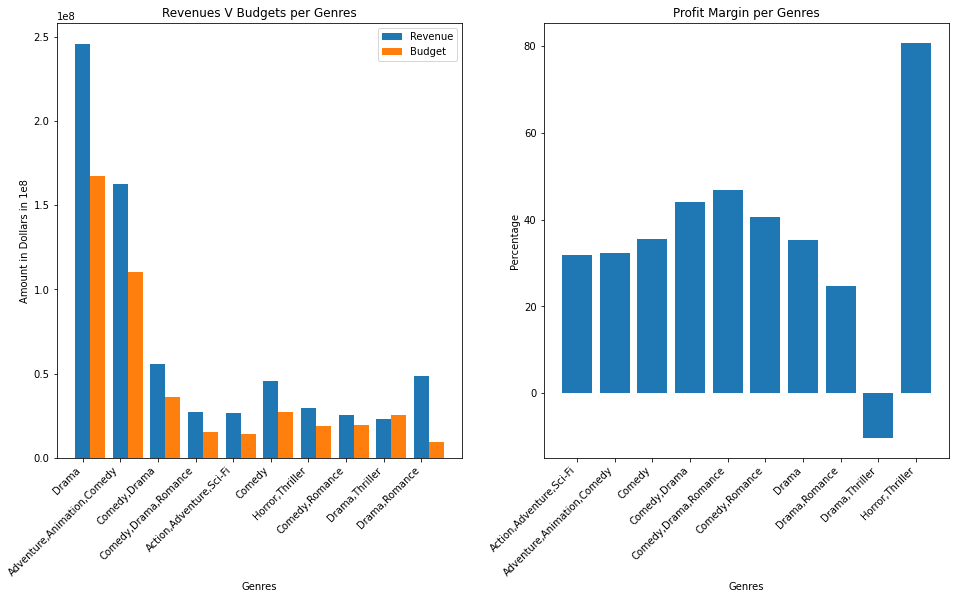

In [75]:
# Revenues, Budgets and Profit Margins based on genres with the most movies
generate_financials(feature="genres")

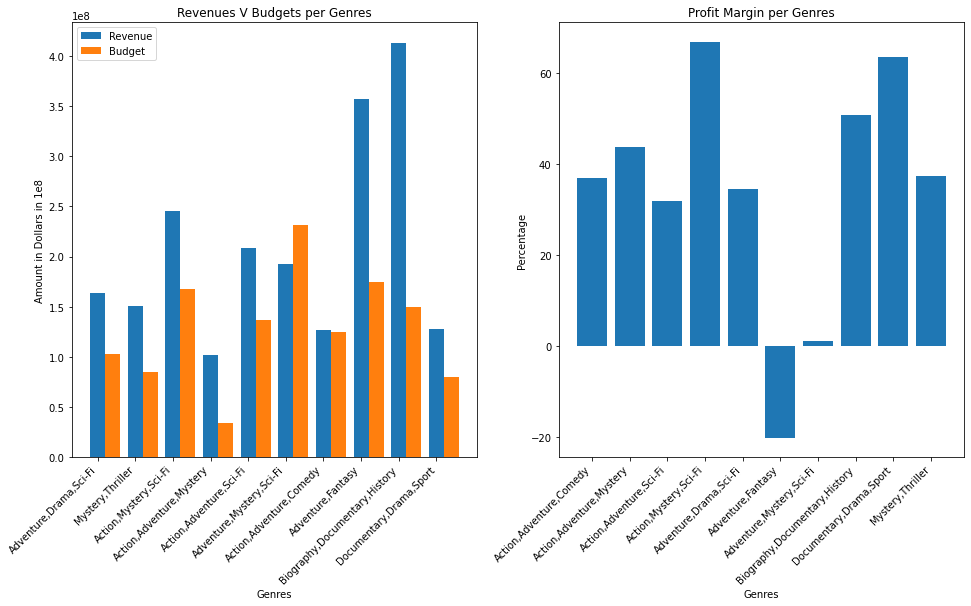

In [76]:
# Revenues, Budgets and Profit Margins based on the top 10 genres with the highest votecounts
generate_financials(feature="genres", basis="vote count")

Observation:


When comparing revenues against budgets, it's evident that Dramas and Adventure|Animation|Comedy films utilized higher budgets but also yielded high returns. However, from a relative perspective, Horror|Thriller films returned significantly more in terms of profit per dollar invested. Conversely, the Drama|Thriller category performed poorly in relative terms.

In terms of vote count, Action|Mystery|Sci-Fi films had a higher return, followed by Documentary|Drama|Sport genres.

# Exploring directors


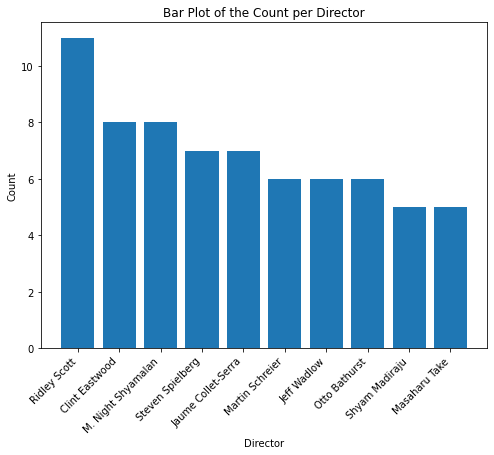

In [77]:
# movies_df["director"].value_counts()[:10].plot(kind='bar');
plot_bar(data=movies_df["director"].value_counts()[:10],
        title="Bar Plot of the Count per Director",
        xlabel="Director",
        ylabel="Count")

Observation:


Ridley Scott has directed the highest number of movies, whereas Baris Atay and Snaevar Solvvanson have directed fewer movies.

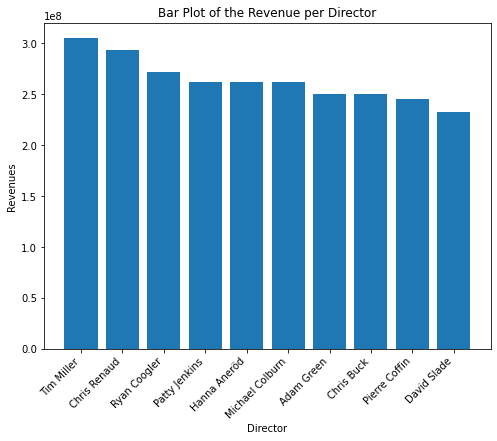

In [78]:
# Directors' Profit generation
director_revenues = movies_df.groupby("director")["profit"].mean().sort_values(ascending = False)[:10]
# director_revenues.plot(kind='bar');
plot_bar(data=director_revenues,
        title="Bar Plot of the Revenue per Director",
        xlabel="Director",
        ylabel="Revenues")

Observation:


In terms of absolute profitability, Tim Miller is generating more profit than any other director. It would be beneficial to investigate the directors based on their vote counts.

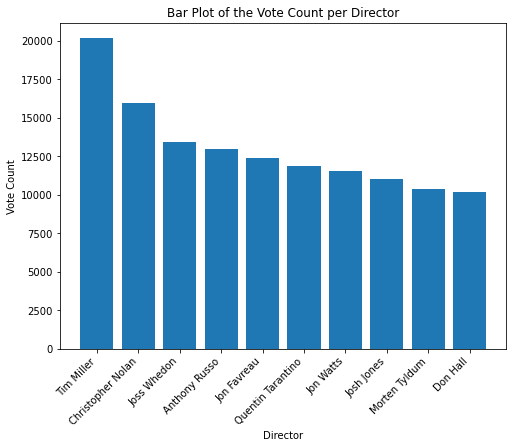

In [79]:
plot_bar(data=movies_df.groupby("director").mean()["vote_count"].sort_values(ascending=False)[:10],
        title="Bar Plot of the Vote Count per Director",
        xlabel="Director",
        ylabel="Vote Count")

Observation:


The average vote counts indicate that the most popular directors are Tim Miller and Christopher Nolan.

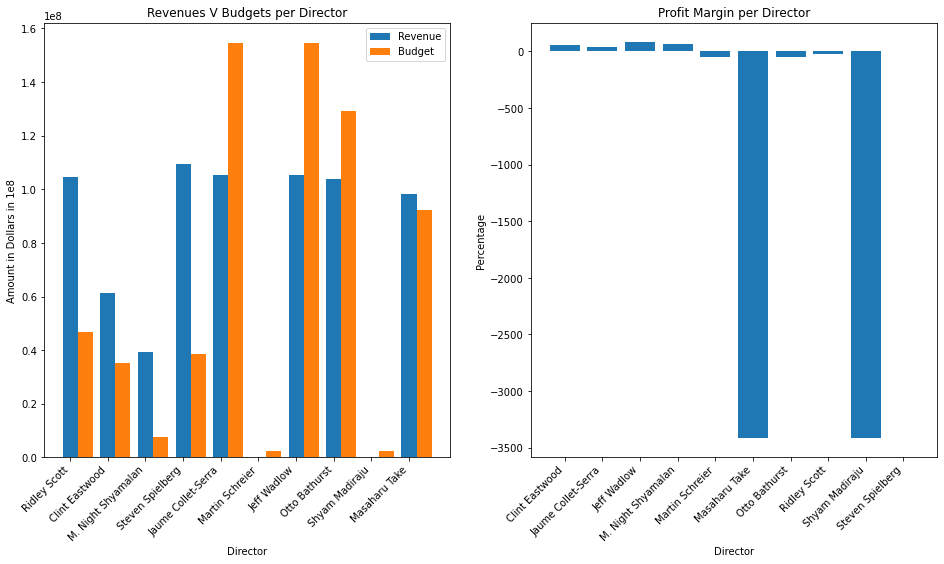

In [80]:
# Revenues, Budgets and Profit Margins based on the top 10 directors with the most movies
generate_financials(feature="director")

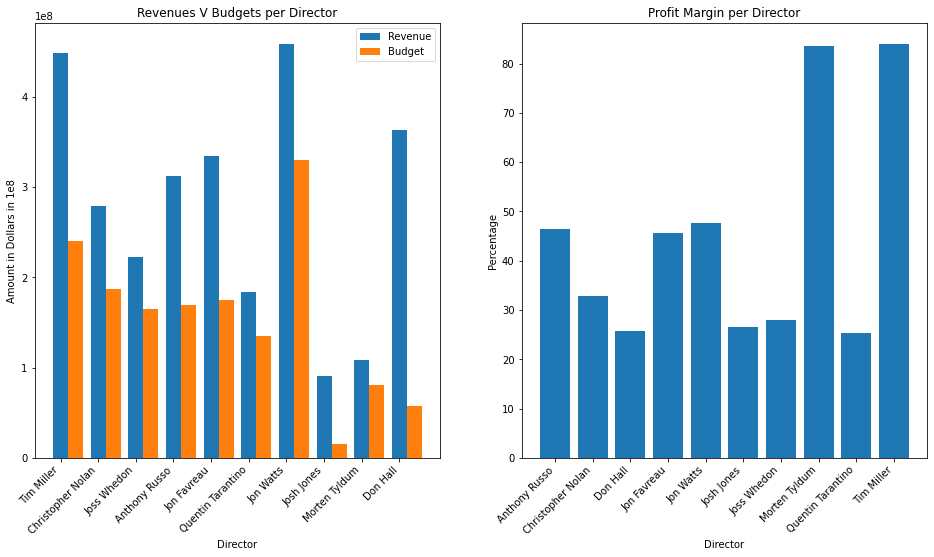

In [81]:
# Revenues, Budgets and Profit Margins based on the top 10 directors with the highest vote count
generate_financials(feature="director", basis="vote count")

Observation:


From the bar charts above, examining the directors with the highest vote counts shows that Morten Tyldum and Tim Miller have superior profit margins compared to all other directors. Conversely, Jeff Wadlow and M. Night Shyamalan had the highest profit margins among directors with the most movies made in this dataset.







# Exploring Studios

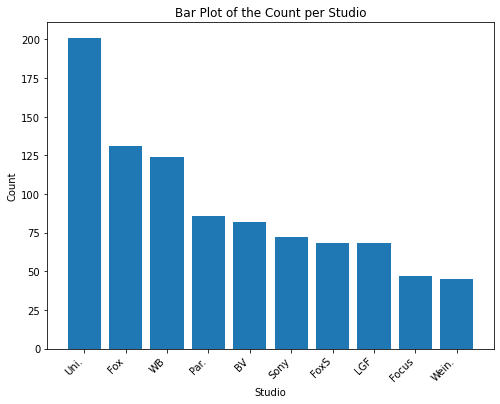

In [82]:
plot_bar(data=movies_df["studio"].value_counts(ascending=False)[:10],
        title="Bar Plot of the Count per Studio",
        xlabel="Studio",
        ylabel="Count")


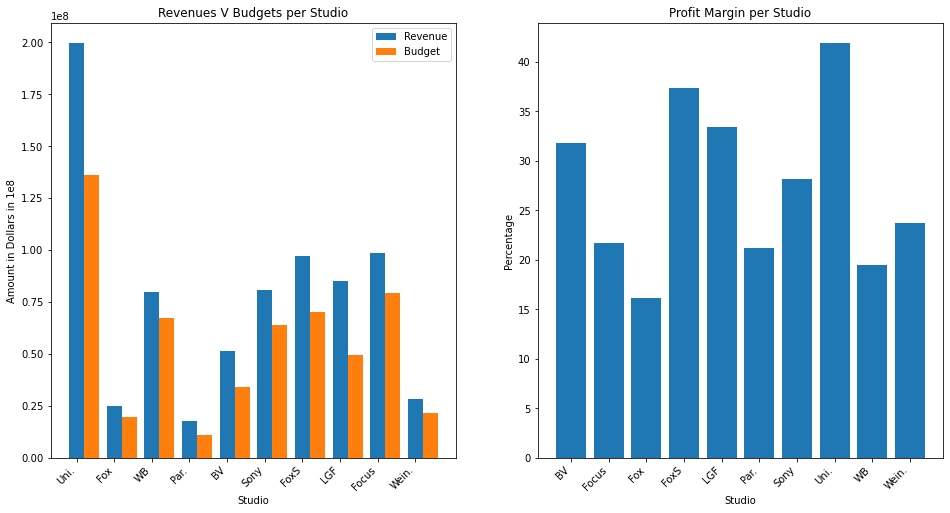

In [83]:
generate_financials(feature="studio")

Analysis Overview:


A comprehensive examination indicates that Universal Studios is leading in terms of revenue both in absolute and relative terms. Warner Brothers (NL) and Fox(S) follow closely, securing second and third positions respectively.

## CONCLUSIONS DRAWN


After analyzing the data, several conclusions can be drawn:

-Movie Runtimes:


Optimal runtimes fall between 90 and 110 minutes.


-Release Periods:

The most favorable time to release movies is between October and December.


-Feature Correlations:

Higher returns are associated with higher vote counts.
Popular movies tend to receive a significant number of votes.
There is a positive correlation between revenue and profits.


-Genres:

Dramas are the most produced genre.
However, Sci-Fi movies yield the highest absolute profits.
Horror|Thriller movies offer the highest return per dollar invested.
Adventure|Drama|Sci-Fi receives the most votes, while Animation|Comedy|Family is gaining popularity.


-Directors:

Ridley Scott has directed the most movies.
Directors Tim Miller and Christopher Nolan have the highest average vote counts.
Jeff Wadlow and M. Night Shyamalan have the highest profit margins among directors with the most movies.


-Studios:

Universal Studios, WB(NL), and Fox(S) are the biggest competitors in the market.


# Final Statements:

Following these recommendations can help us capture a significant share of the market by producing favorable and profitable genres with top directors, adhering to optimal release periods and movie runtimes. This approach is likely to boost vote counts and studio popularity.

# Caution:
It's important to note that correlation does not imply causation